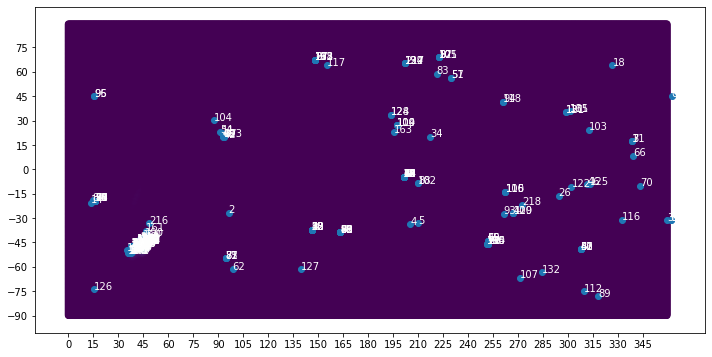

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
probmap = pd.read_csv('probmap.csv')

df = pd.DataFrame()
file = open('data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes
df = df[df['mode'] == 'PHOTON'].sort_values(by=['start time'])

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xticks(np.arange(0, 360, 15))
ax.set_yticks(np.arange(-90, 90, 15))
ax.scatter(probmap['ra'], probmap['dec'], c=probmap['prob'])
ax.scatter(df['ra'], df['dec'])
for i in np.arange(df.shape[0]):
    ax.annotate(i, (df['ra'].tolist()[i], df['dec'].tolist()[i]), color='white')

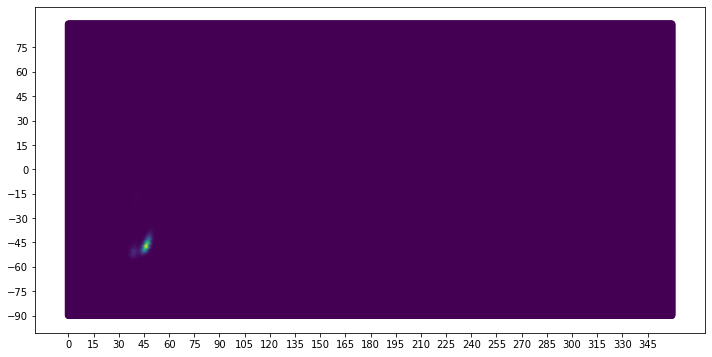

In [2]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xticks(np.arange(0, 360, 15))
ax.set_yticks(np.arange(-90, 90, 15))
ax.scatter(probmap['ra'], probmap['dec'], c=probmap['prob'])

In [4]:
from shutil import copyfile
import os
subset = df[(df.ra<60) & (df.ra>30) & (df.dec > -60) & (df.dec < -30)]

c = 0
for i, row in subset.iterrows():
    targetid = row['targetid']
    dirs = os.listdir('.')
    for dir in dirs:
        if str(targetid) in dir:
            files = os.listdir(dir+'/xrt/event/')
            for file in files:
                if 'pc' in file and 'cl' in file:
                    copyfile(dir+'/xrt/event/'+file, 'events/'+str(c)+'_'+dir+'_'+file)
                    print(dir+'_'+file+'_'+str(c))
                    c += 1

07009202001_sw07009202001xpcw3po_cl.evt.gz_0
07009203001_sw07009203001xpcw3po_cl.evt.gz_1
07009204001_sw07009204001xpcw3po_cl.evt.gz_2
07009205001_sw07009205001xpcw3po_cl.evt.gz_3
07009206001_sw07009206001xpcw3po_cl.evt.gz_4
07009207001_sw07009207001xpcw3po_cl.evt.gz_5
07009208001_sw07009208001xpcw3po_cl.evt.gz_6
07009209001_sw07009209001xpcw3po_cl.evt.gz_7
07009210001_sw07009210001xpcw3po_cl.evt.gz_8
07009211001_sw07009211001xpcw3po_cl.evt.gz_9
07009212001_sw07009212001xpcw3po_cl.evt.gz_10
07009213001_sw07009213001xpcw3po_cl.evt.gz_11
07009214001_sw07009214001xpcw3po_cl.evt.gz_12
07009215001_sw07009215001xpcw3po_cl.evt.gz_13
07009216001_sw07009216001xpcw3po_cl.evt.gz_14
07009217001_sw07009217001xpcw3po_cl.evt.gz_15
07009218001_sw07009218001xpcw3po_cl.evt.gz_16
07009219001_sw07009219001xpcw3po_cl.evt.gz_17
07009220001_sw07009220001xpcw3po_cl.evt.gz_18
07009221001_sw07009221001xpcw3po_cl.evt.gz_19
07009222001_sw07009222001xpcw3po_cl.evt.gz_20
07009223001_sw07009223001xpcw3po_cl.evt.gz_2